
# Project 13: Model Calibration For Equities
## UNI: dk2985

Import modules

In [1]:
import numpy as np
import pandas as pd

import cmath
import math


from scipy.optimize import fmin
from scipy.optimize import fmin_bfgs
from scipy.optimize import brute

from scipy import interpolate

#dataprocessing module
import dataProcessing as dp

#selecting the model and optimising params
import genericModel as gm

#calibration module
import calibration as gc

#plotting
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import time

Set global parameters

In [2]:
#Parameters
models = ('Heston','VG','VGSA','VGSSD')
stocks = ('apple','msft','fb')
algos = ('Nelder_Mead','BFGS','Grid_Search')
# spots = [220.65, 109.63, 154.78]
myspots = {'apple':220.65,
           'msft':109.63,
           'fb':154.78}
# spot price as of close of October 22nd, 2018
optionType = ('Call', 'Put')

# risk free rate
r = 0.0245
# dividend rate
q = 0.005

# Parameters
eta_global = 0.2
n = 12



In [3]:
#Calibration Model

def f(model,stock,algo,S0,optionType,params, r=r, q=q,eta_global=eta_global, n=n):

    maturities, strikes, optionPrices = dp.readNPlot(excel_file = "data_"+stock+".xlsx", option = optionType)
    marketPrices = optionPrices
    maturities_years = maturities/365.0

    if (optionType=='Call'):
        alpha = 1.5
    elif (optionType=='Put'):
        alpha = -1.5        

    arg = (marketPrices, maturities_years, strikes, r, q, S0, alpha, eta_global, n, model)
    
    lenT = len(maturities)
    lenK = len(strikes)
    modelPrices = np.zeros((lenT, lenK))
    start_time = time.time()
    params2 = gm.generic_algo(algo, model, params, arg, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta_global, n)

    for ii in range(lenT):
        for jj in range(lenK):
            T = maturities_years[ii]
            K = strikes[jj]
            [km, cT_km] = gc.generic_FFT(params2, S0, K, r, q, T, alpha, eta_global, n, model)
            modelPrices[ii,jj] = cT_km[0]
#             print(modelPrices[ii,jj])

    fig = plt.figure(figsize=(12.,12.))
    labels = []
    colormap = cm.Spectral
    plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
    
    for kk in range(len(maturities)):
        plt.plot(strikes, optionPrices[kk,:], 'x')
        labels.append('T = ' + str(maturities[kk]))

    for kk in range(len(maturities)):
        plt.plot(strikes, modelPrices[kk,:], '+')
        labels.append('T = ' + str(maturities[kk]))
    
    plt.legend(labels, loc='upper right', ncol=2)
    #plt.grid(alpha=0.25)
    plt.xlabel('Strike')
    plt.ylabel('Price')
    plt.title('Market vs. Model')
    #plt.savefig('MarketvsModel_BFGS.png')
    plt.show() 
    print("--- %s seconds ---" % (time.time() - start_time))
    return params2

apple
Parameters of the model [1.3, 0.056, 0.0625, -0.43, 0.064]



new min found
1.9500883705647423


new min found
1.7838754978739182


new min found
1.7828784588624882


new min found
1.7647084706858693


new min found
1.7643557047112937


Solution of grid search:
[1.8, 0.7, 0.0125, -0.43000000000000005, 0.059]
Optimal rmse = 1.7643557047112937


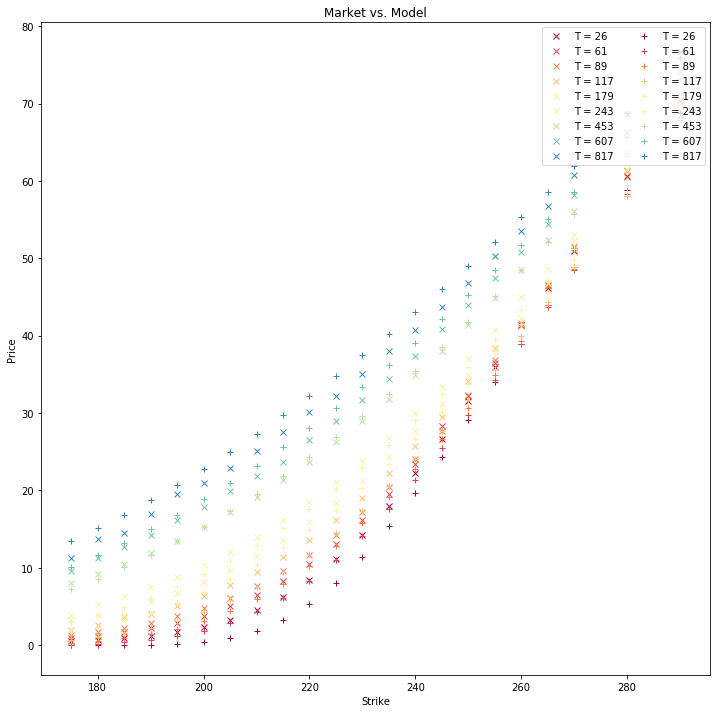

--- 326.61490178108215 seconds ---


t: (array([ 1.69030403,  0.71192262,  0.01274676, -0.3545745 ,  0.06956977]), 1.4789215842352668, 10, 23, 2)


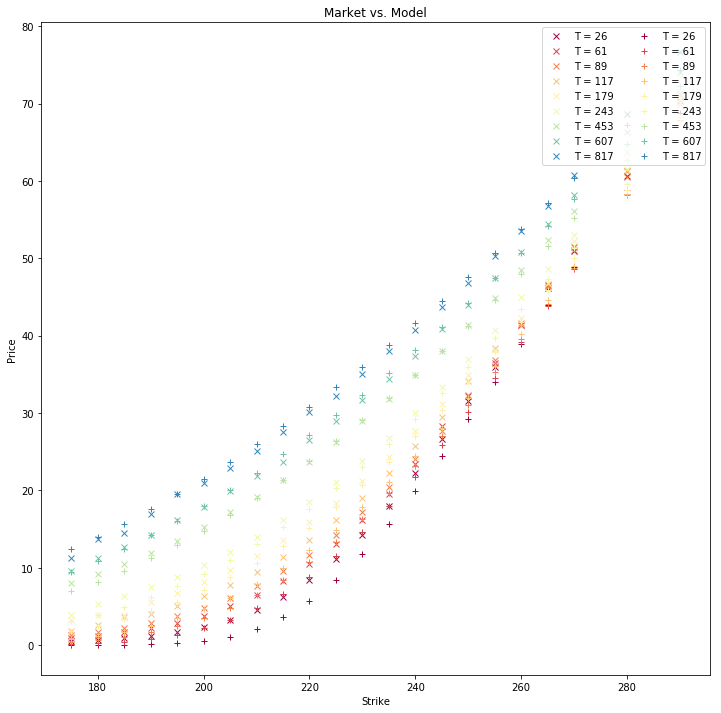

--- 161.37128067016602 seconds ---


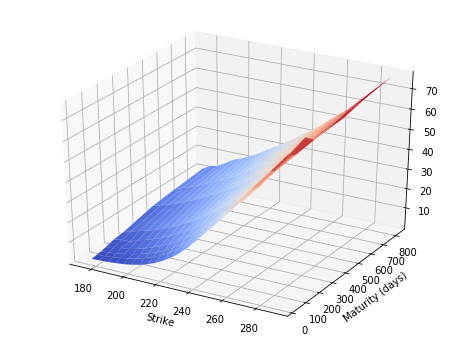

         Current function value: 0.981688
         Iterations: 10
         Function evaluations: 224
         Gradient evaluations: 32
[6.06124238 0.72459777 0.02843156 1.41017539 0.13084236]


--- 1493.6779010295868 seconds ---
msft
Parameters of the model [1.3, 0.056, 0.0625, -0.43, 0.064]



new min found
1.0917940311075103


new min found
1.0348643538723479


new min found
1.0339808656201943


new min found
1.032045246501316


new min found
0.997645403559896


new min found
0.9970190728428998


new min found
0.986451552947703


new min found
0.9859863960250578


Solution of grid search:
[2.3, 0.7, 0.0125, -0.43000000000000005, 0.059]
Optimal rmse = 0.9859863960250578


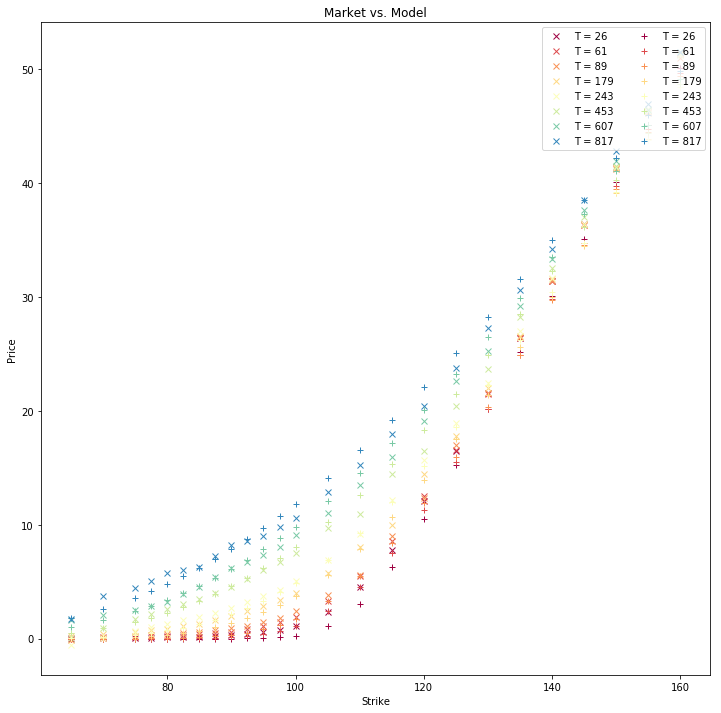

--- 333.17995429039 seconds ---


t: (array([ 2.37882192,  0.7068712 ,  0.01152938, -0.38967563,  0.06869195]), 0.9453851685725838, 10, 21, 2)


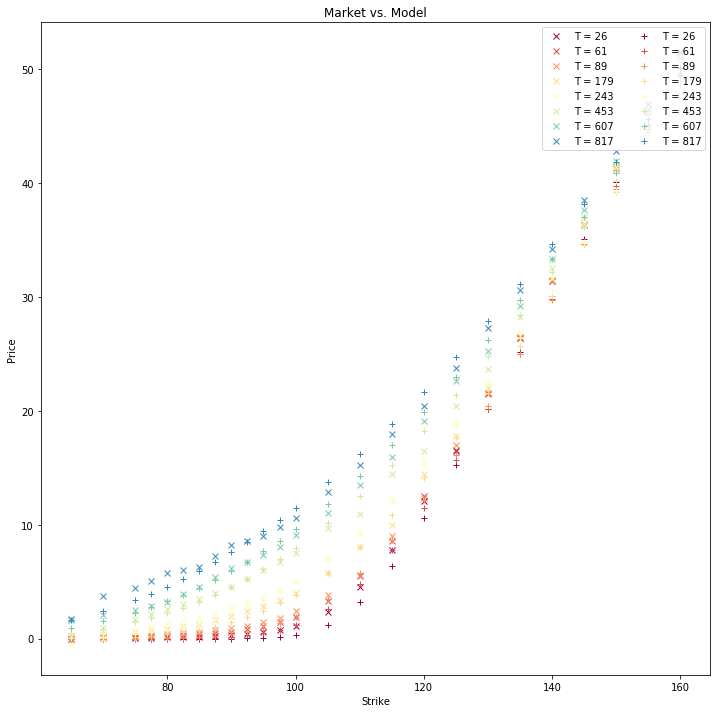

--- 148.0126872062683 seconds ---


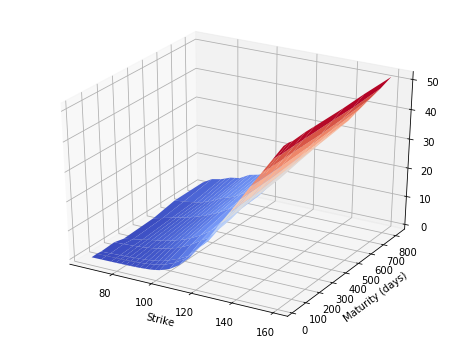

         Current function value: 0.868363
         Iterations: 10
         Function evaluations: 168
         Gradient evaluations: 24
[3.41764881 0.71716791 0.01511287 1.02213713 0.10909181]


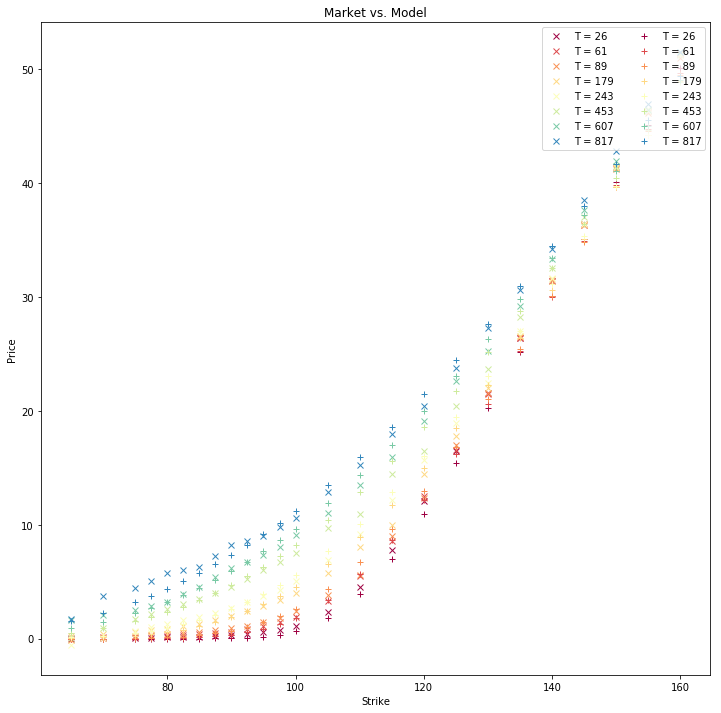

--- 1138.816504240036 seconds ---
fb
Parameters of the model [1.3, 0.056, 0.0625, -0.43, 0.064]


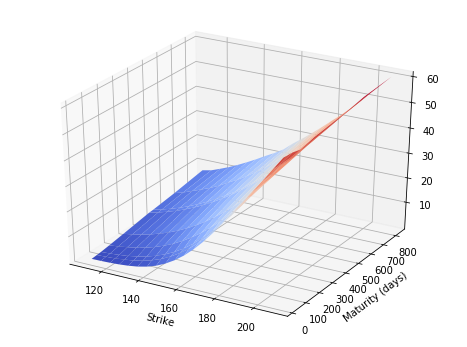


new min found
2.475180182967195


new min found
2.2808753505770993


new min found
2.2789054216543394


new min found
2.190521187553365


new min found
2.0329865924712083


new min found
2.0313728083815277


new min found
1.9969986204334842


new min found
1.8643179599248887


new min found
1.8629610428122063


Solution of grid search:
[2.3, 0.7, 0.0125, -0.43000000000000005, 0.059]
Optimal rmse = 1.8629610428122063


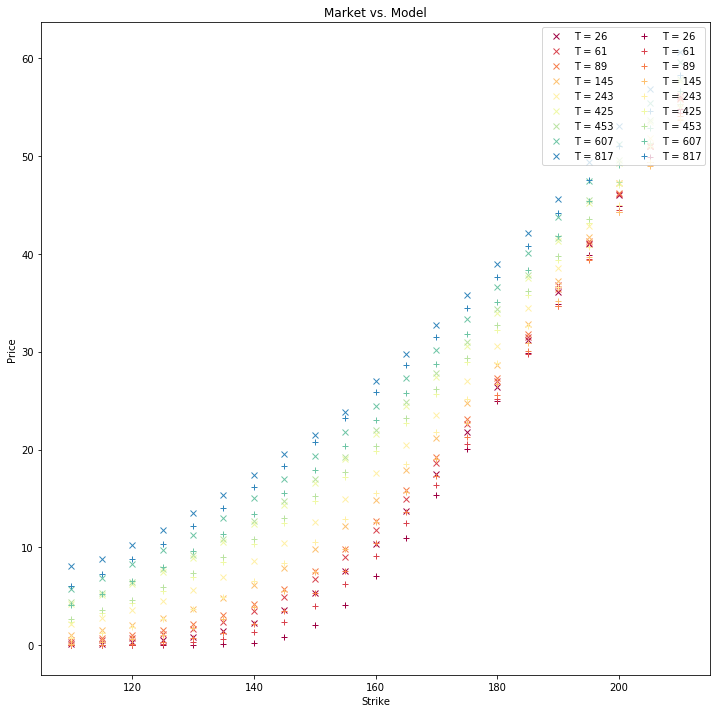

--- 7522.624382257462 seconds ---


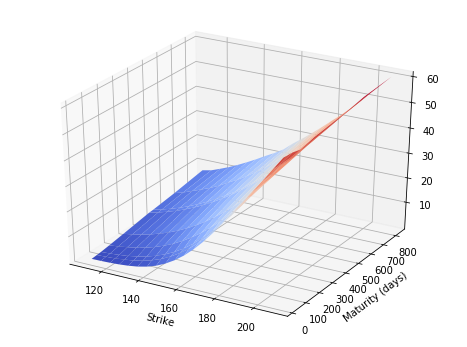

t: (array([ 2.40304  ,  0.6776   ,  0.01216  , -0.419164 ,  0.0616432]), 1.2954631450823426, 10, 22, 2)


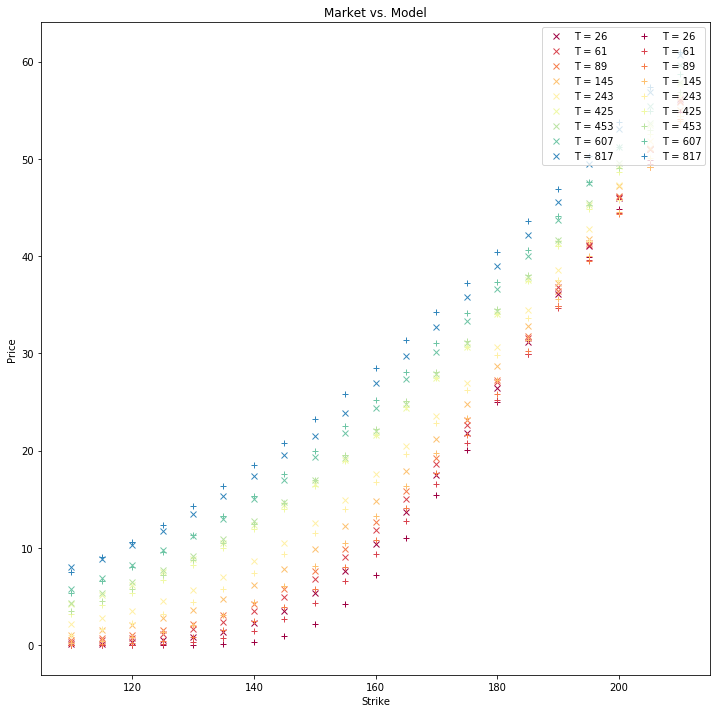

--- 128.25826215744019 seconds ---


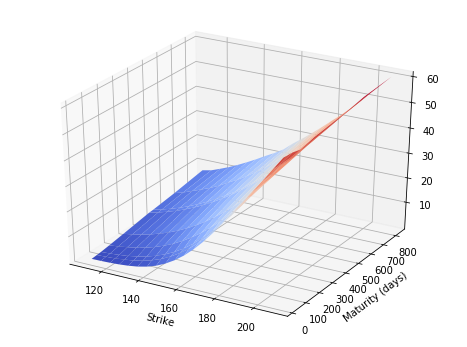

         Current function value: 0.640760
         Iterations: 10
         Function evaluations: 105
         Gradient evaluations: 15
[ 2.82706001  0.7052293   0.05741409 -0.37852003  0.14077945]


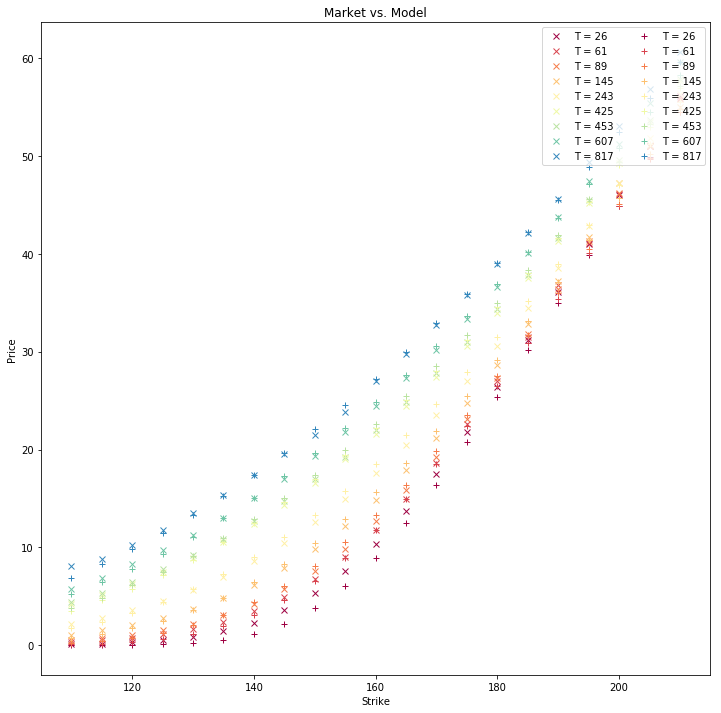

--- 5716.954750299454 seconds ---


In [4]:
for j in stocks:
    print(j)
    S0 = myspots[j]
    params_gridsearch = f('Heston',j,'Grid_Search',S0,'Put',gm.generic_model('Heston'))
    final_params = f('Heston',j,'Nelder_Mead',S0,'Put',params_gridsearch)
    bfgs_params = f('Heston',j,'BFGS',S0,'Put',params_gridsearch)

apple
Parameters of the model [0.25, 0.4, -0.3, 0.05]


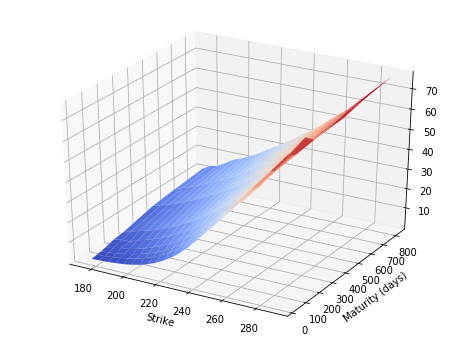


new min found
3.067151310001107


new min found
2.793071407794302


Solution of grid search:
[0.2, 0.05, -0.05, 0.6]
Optimal rmse = 2.793071407794302


--- 59.20071506500244 seconds ---


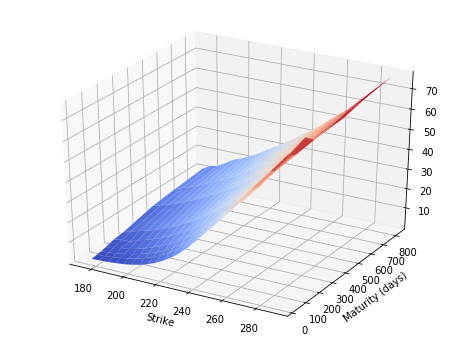

t: (array([ 0.25925293,  0.04168701, -0.05368042,  0.62553223]), 1.5098077303220556, 10, 20, 2)


--- 140.51080513000488 seconds ---


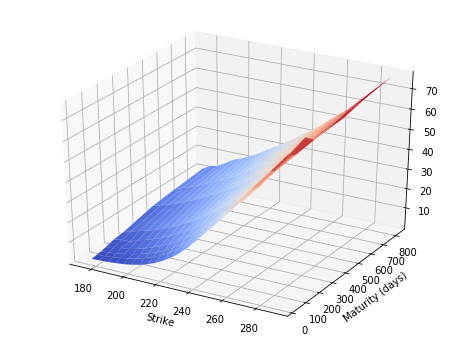

         Current function value: 1.533791
         Iterations: 3
         Function evaluations: 174
         Gradient evaluations: 28
[ 0.24710338  0.04725785 -0.05483096  0.55090726]


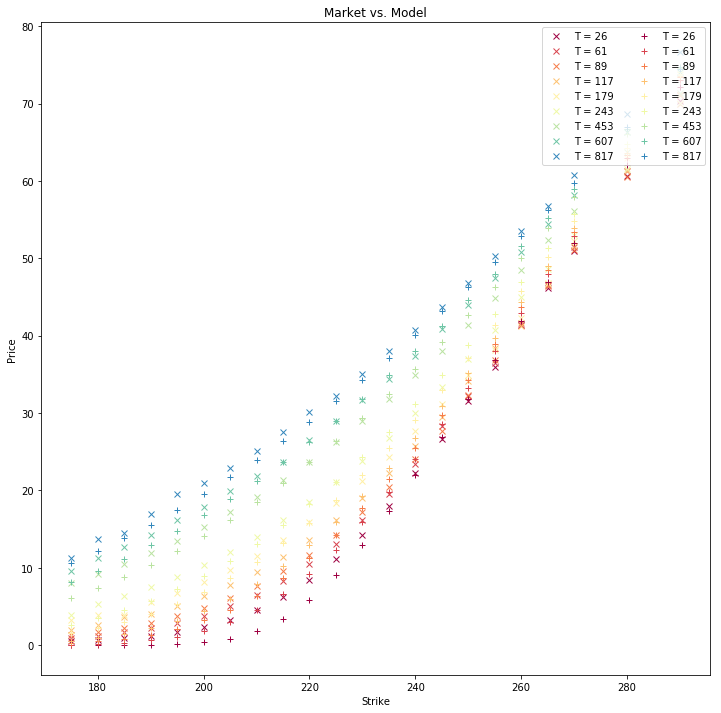

--- 17213.780776500702 seconds ---
msft
Parameters of the model [0.25, 0.4, -0.3, 0.05]


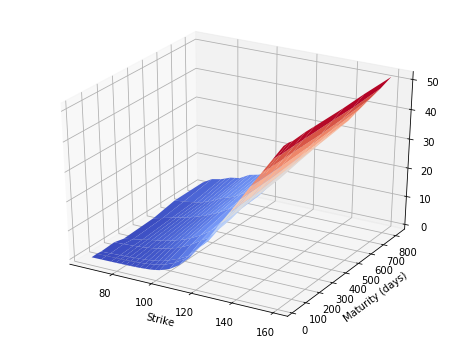


new min found
1.5242661788134517


new min found
1.3431265424035848


Solution of grid search:
[0.2, 0.05, -0.05, 0.6]
Optimal rmse = 1.3431265424035848


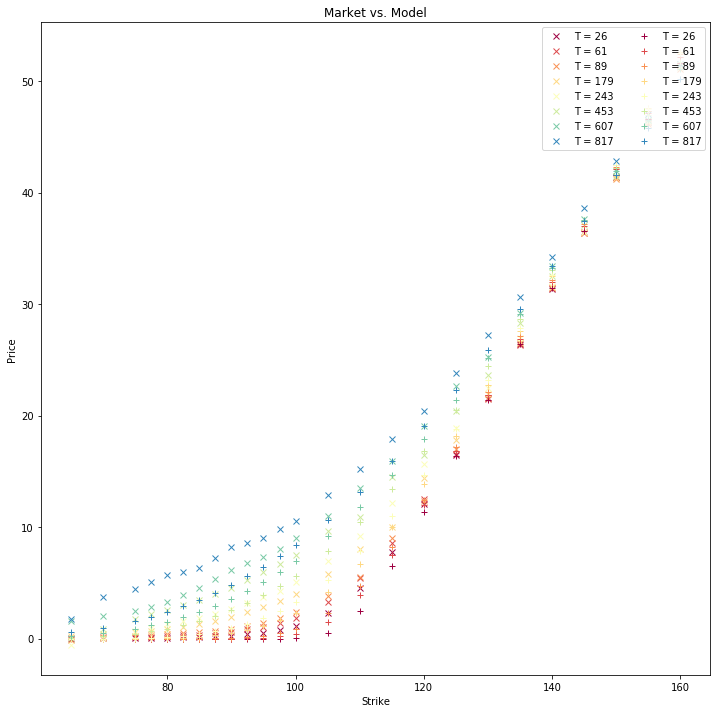

--- 30.4784677028656 seconds ---


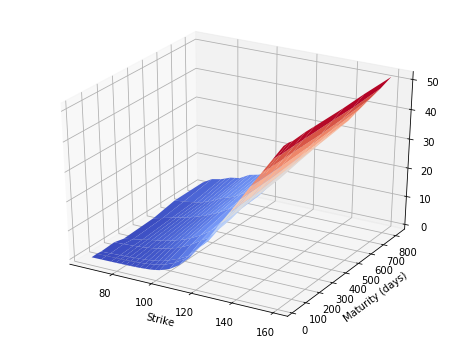

t: (array([ 0.25784668,  0.04114014, -0.05464722,  0.63643066]), 0.7651552530312484, 10, 18, 2)


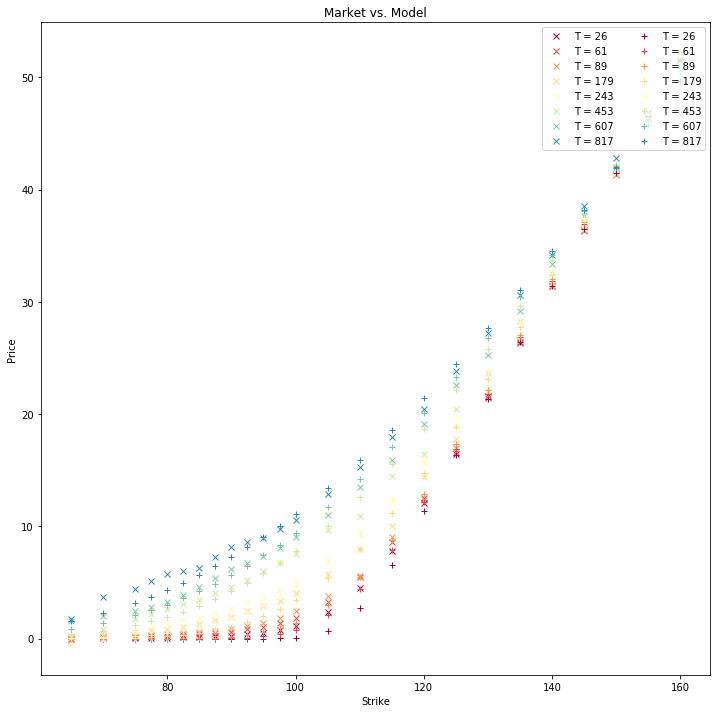

--- 66.52234363555908 seconds ---


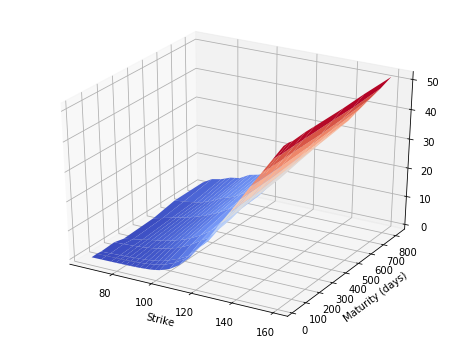

         Current function value: 0.661327
         Iterations: 10
         Function evaluations: 84
         Gradient evaluations: 14
[ 0.27998303  0.77230587 -0.05565018  0.65561705]


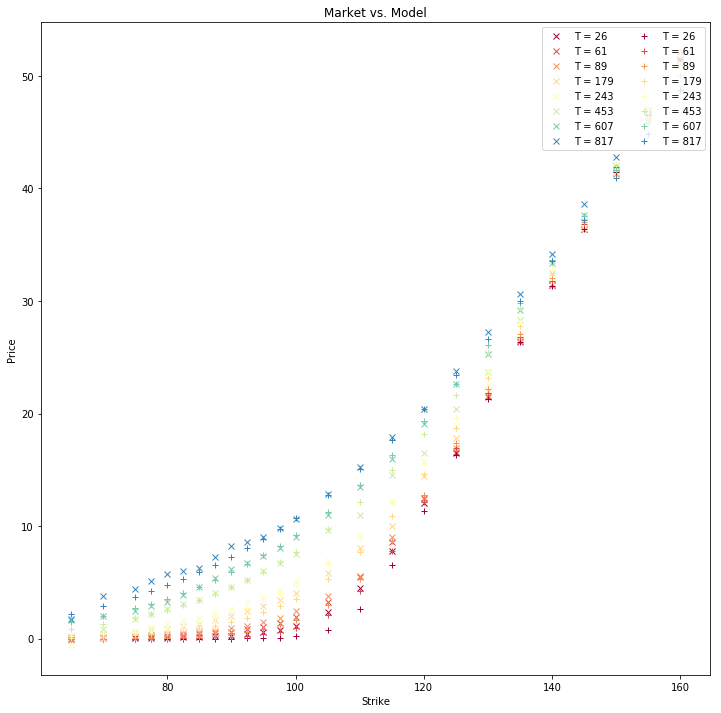

--- 283.2197914123535 seconds ---
fb
Parameters of the model [0.25, 0.4, -0.3, 0.05]


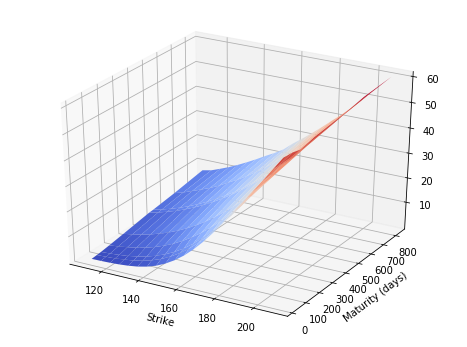


new min found
3.6147151474313794


new min found
3.359876856946293


Solution of grid search:
[0.2, 0.05, -0.05, 0.6]
Optimal rmse = 3.359876856946293


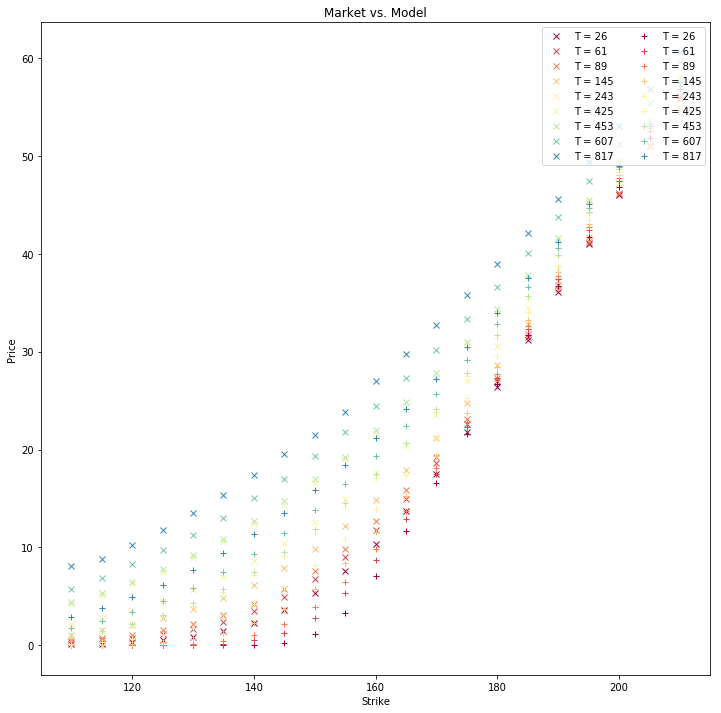

--- 27.840555429458618 seconds ---


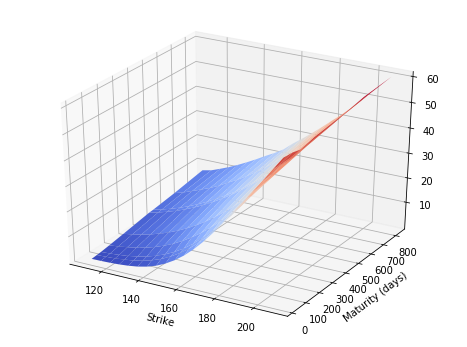

t: (array([ 0.28114502,  0.03764771, -0.05314758,  0.6667749 ]), 1.4411741405187442, 10, 18, 2)


--- 57.389105558395386 seconds ---


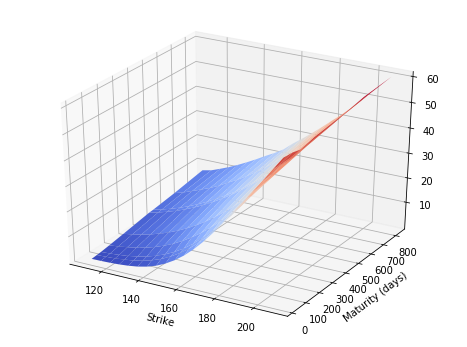

         Current function value: 1.284149
         Iterations: 3
         Function evaluations: 102
         Gradient evaluations: 15
[ 0.29982704  0.01554931 -0.06173887  0.52137798]


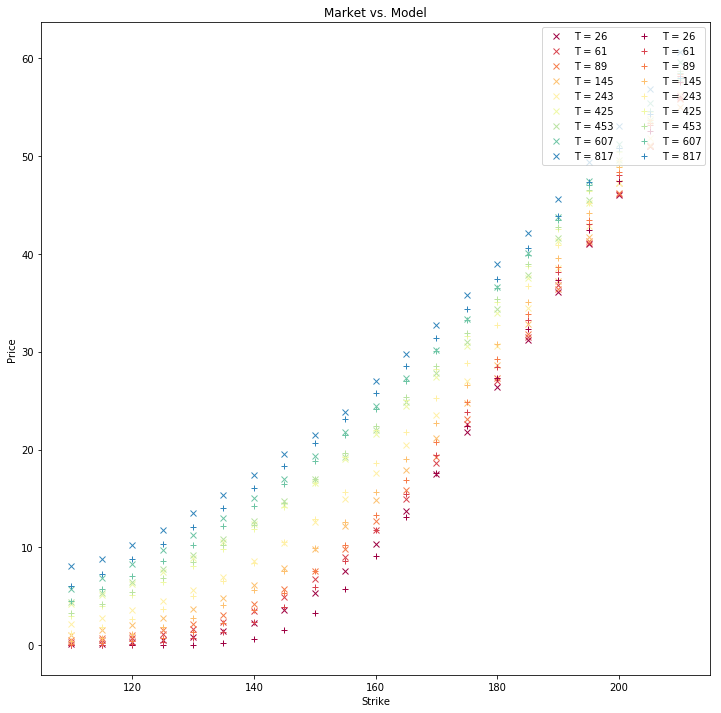

--- 351.4304904937744 seconds ---


In [5]:
for j in stocks:
    print(j)
    S0 = myspots[j]
    params_gridsearch = f('VGSSD',j,'Grid_Search',S0,'Put',gm.generic_model('VGSSD'))
    final_params = f('VGSSD',j,'Nelder_Mead',S0,'Put',params_gridsearch)
    bfgs_params = f('VGSSD',j,'BFGS',S0,'Put',params_gridsearch)

In [ ]:
# for i in models:
#     for j in stocks:
#         S0 = myspots[j]
#         print(stocks[j])
#         params_gridsearch = f(i,j,'Grid_Search',S0,'Call',gm.generic_model(i))
#         final_params = f(i,j,'Nelder_Mead',S0,'Call',params_gridsearch)